## Pandas - Joins 
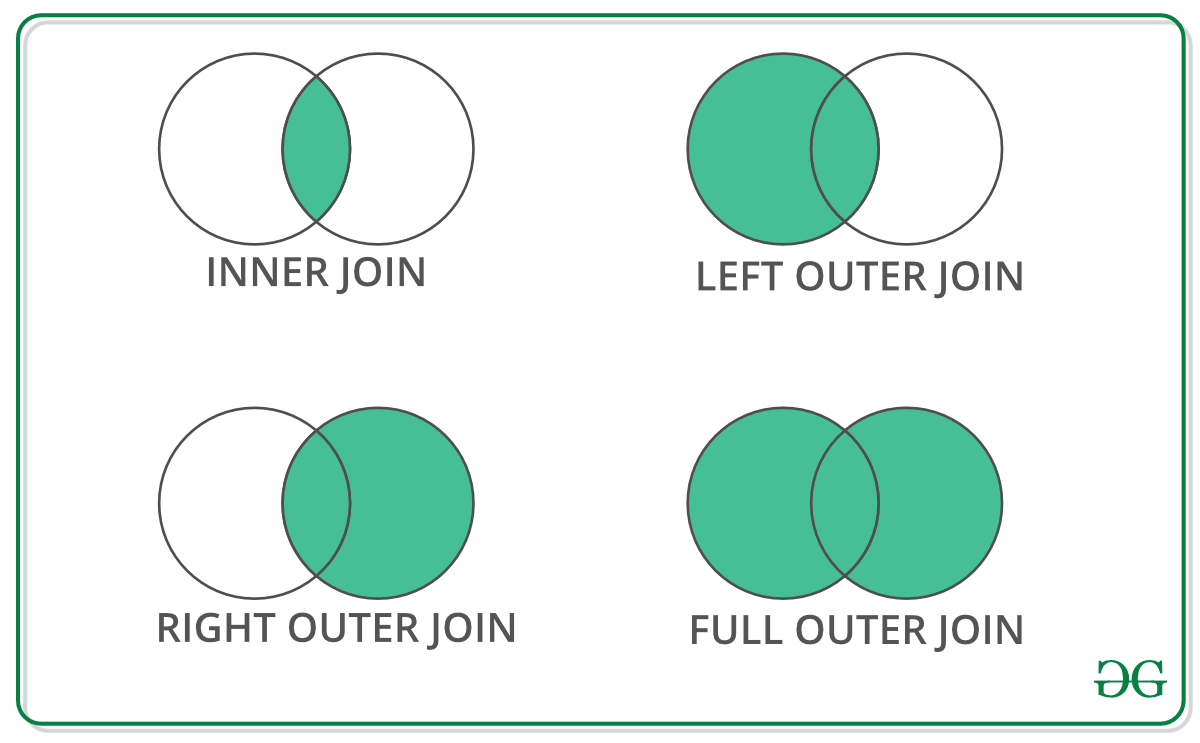

In [1]:
import pandas as pd
emp = pd.read_csv(r"E:\Sindhura\DataSets\emp_2.csv")
dept = pd.read_csv(r"E:\Sindhura\DataSets\dept.csv")

In [2]:
emp

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113


In [3]:
dept

,dept_id,dname
0,10,HR
1,20,MKT
2,30,SAL
3,40,ADM
4,50,FIN
5,60,ACC


## Inner Join : Retrives the mataching records from both the tables
syntax:
pd.merge(left=df_name,right=df_name,how="inner",left_on="col_name_left",right_on="col_name_right")

In [4]:
inner_df = pd.merge(left=emp,right=dept,how="inner",left_on="did",right_on="dept_id")
inner_df

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20,MKT
1,102,Raman,Tripathi,7000,20,20,MKT
2,103,Chaman,Nagor,8000,20,20,MKT
3,104,Nisha,Patil,9000,30,30,SAL
4,105,Madhu,Reddy,10000,30,30,SAL


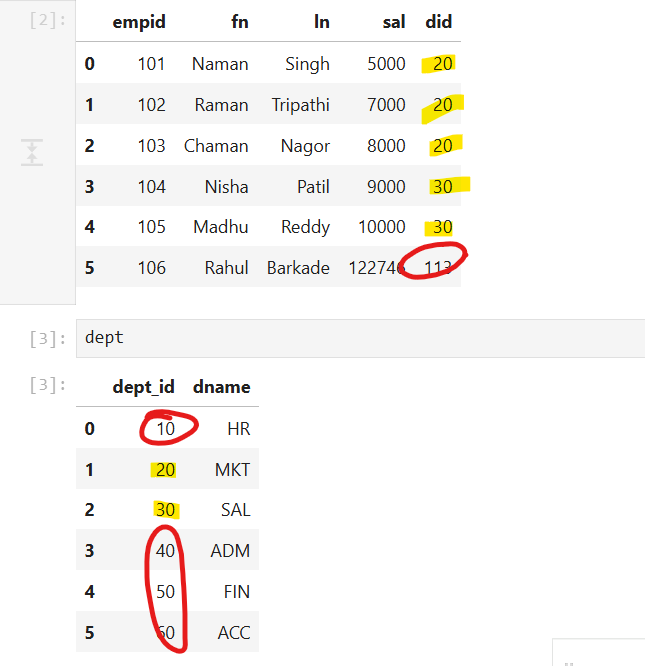

## Find out employee details(name, salary) of employees who are working in MKT department


In [5]:
inner_df

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20,MKT
1,102,Raman,Tripathi,7000,20,20,MKT
2,103,Chaman,Nagor,8000,20,20,MKT
3,104,Nisha,Patil,9000,30,30,SAL
4,105,Madhu,Reddy,10000,30,30,SAL


In [6]:
fil1 = inner_df["dname"]=="MKT"
inner_df[fil1]

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20,MKT
1,102,Raman,Tripathi,7000,20,20,MKT
2,103,Chaman,Nagor,8000,20,20,MKT


In [7]:
inner_df[fil1][["fn","ln","sal","dname"]]

,fn,ln,sal,dname
0,Naman,Singh,5000,MKT
1,Raman,Tripathi,7000,MKT
2,Chaman,Nagor,8000,MKT


## Left Join: All the matching records will be retrieved and all the non matching records from left  table will also be retreived.
## Corresponding right table columns will be updated with NULL DATA.
syntax: pd.merge(left=df_name,right=df_name,how="left",left_on="col_name_left",right_on="col_name_right")

In [9]:
left_df = pd.merge(left=emp,right=dept,how="left",left_on="did",right_on="dept_id")
left_df

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20.0,MKT
1,102,Raman,Tripathi,7000,20,20.0,MKT
2,103,Chaman,Nagor,8000,20,20.0,MKT
3,104,Nisha,Patil,9000,30,30.0,SAL
4,105,Madhu,Reddy,10000,30,30.0,SAL
5,106,Rahul,Barkade,122746,113,NaN,NaN


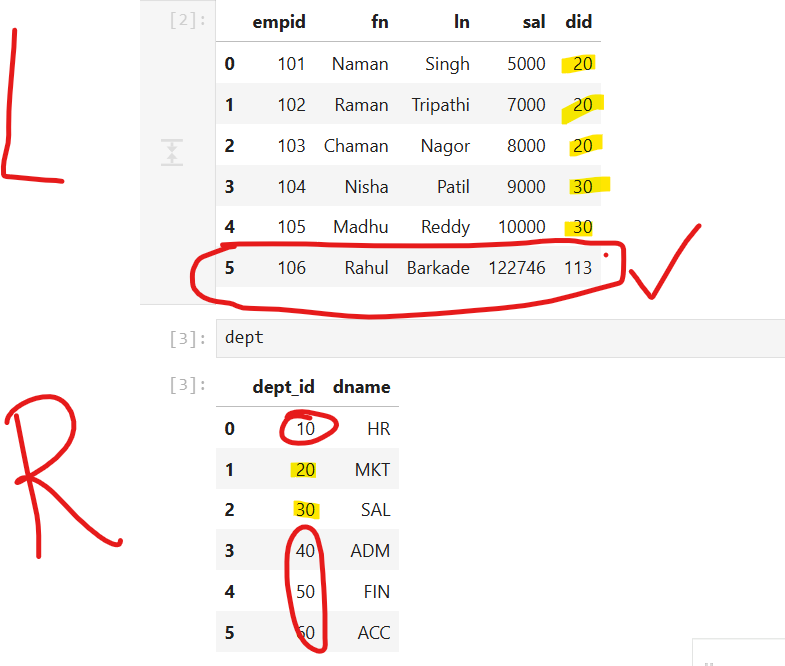

## Find out employee details whose department id is not yet allocated

In [10]:
left_df

,empid,fn,ln,sal,did,dept_id,dname
0,101,Naman,Singh,5000,20,20.0,MKT
1,102,Raman,Tripathi,7000,20,20.0,MKT
2,103,Chaman,Nagor,8000,20,20.0,MKT
3,104,Nisha,Patil,9000,30,30.0,SAL
4,105,Madhu,Reddy,10000,30,30.0,SAL
5,106,Rahul,Barkade,122746,113,NaN,NaN


## methods to check whether data is null or nan
    isna() : True if null/nan data is present. Else False 
    
    isnull() : True if null/nan data is present. Else False

In [12]:
fil2 = left_df["dname"].isna()
left_df[fil2]

,empid,fn,ln,sal,did,dept_id,dname
5,106,Rahul,Barkade,122746,113,NaN,NaN


In [13]:
left_df[fil2][["fn","ln","did"]]

,fn,ln,did
5,Rahul,Barkade,113


## RIght Join: ALl the matching records will be retrieved and all the non matching records from right table will also be retreived.
## Corresponding left table columns will be updated with NULL DATA.
syntax: pd.merge(left=df_name,right=df_name,how="right",left_on="col_name_left",right_on="col_name_right")

In [14]:
right_df = pd.merge(left=emp,right=dept,how="right",left_on="did",right_on="dept_id")
right_df

,empid,fn,ln,sal,did,dept_id,dname
0,NaN,NaN,NaN,NaN,NaN,10,HR
1,101.0,Naman,Singh,5000.0,20.0,20,MKT
2,102.0,Raman,Tripathi,7000.0,20.0,20,MKT
3,103.0,Chaman,Nagor,8000.0,20.0,20,MKT
4,104.0,Nisha,Patil,9000.0,30.0,30,SAL
5,105.0,Madhu,Reddy,10000.0,30.0,30,SAL
6,NaN,NaN,NaN,NaN,NaN,40,ADM
7,NaN,NaN,NaN,NaN,NaN,50,FIN
8,NaN,NaN,NaN,NaN,NaN,60,ACC


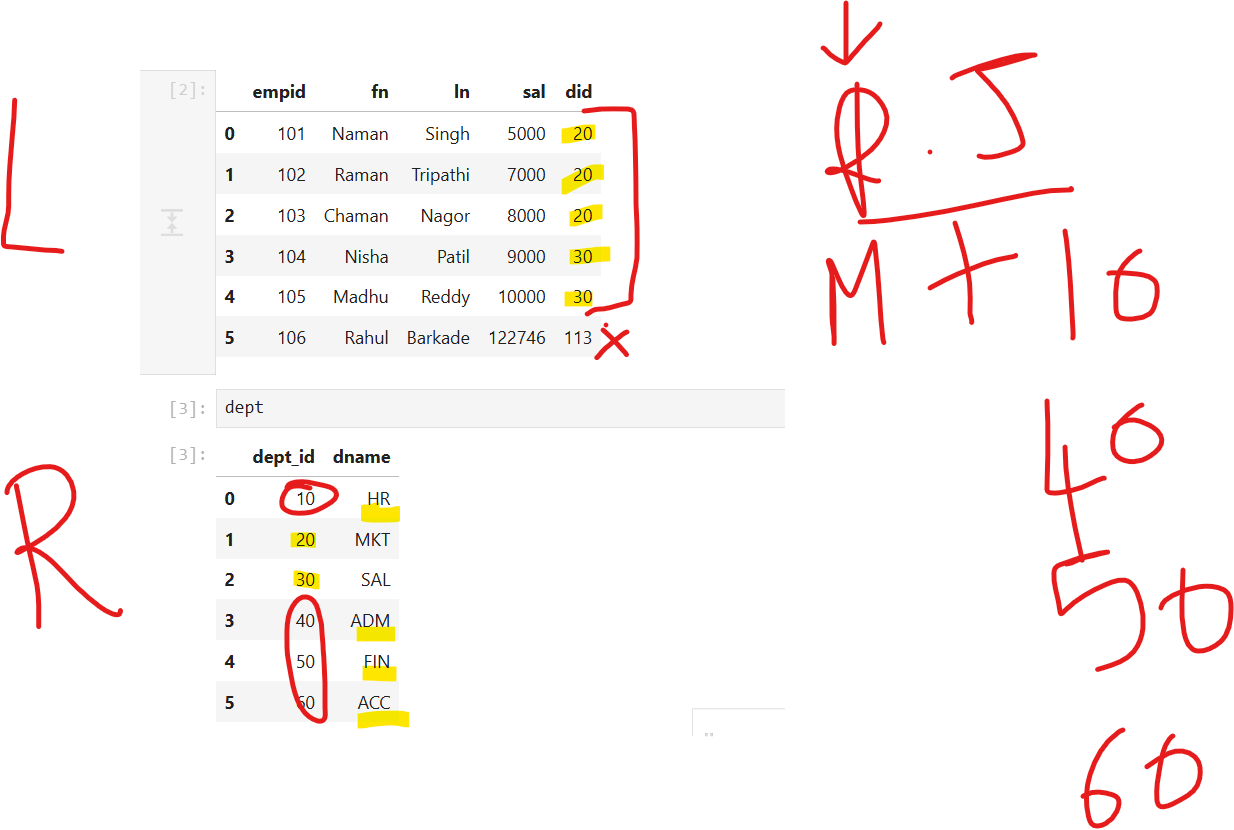

## Find out department details for which employees are not yet hired

In [15]:
right_df

,empid,fn,ln,sal,did,dept_id,dname
0,NaN,NaN,NaN,NaN,NaN,10,HR
1,101.0,Naman,Singh,5000.0,20.0,20,MKT
2,102.0,Raman,Tripathi,7000.0,20.0,20,MKT
3,103.0,Chaman,Nagor,8000.0,20.0,20,MKT
4,104.0,Nisha,Patil,9000.0,30.0,30,SAL
5,105.0,Madhu,Reddy,10000.0,30.0,30,SAL
6,NaN,NaN,NaN,NaN,NaN,40,ADM
7,NaN,NaN,NaN,NaN,NaN,50,FIN
8,NaN,NaN,NaN,NaN,NaN,60,ACC


In [18]:
right_df["empid"].isnull()

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
Name: empid, dtype: bool

In [16]:
fil3 = right_df["empid"].isna()
right_df[fil3]

,empid,fn,ln,sal,did,dept_id,dname
0,NaN,NaN,NaN,NaN,NaN,10,HR
6,NaN,NaN,NaN,NaN,NaN,40,ADM
7,NaN,NaN,NaN,NaN,NaN,50,FIN
8,NaN,NaN,NaN,NaN,NaN,60,ACC


In [17]:
right_df[fil3][["dept_id","dname"]]

,dept_id,dname
0,10,HR
6,40,ADM
7,50,FIN
8,60,ACC


## FullOuter : Data from both the tables will be retrieved
matching records from both the tables +
remaining records from the left table will be retrieved (corresponding right table columns will have null data) +
remaning records from the right table will be retrieved (corresponding left table columns will have null data)

In [19]:
outer_df = pd.merge(left=emp,right=dept,how="outer",left_on="did",right_on="dept_id")
outer_df

,empid,fn,ln,sal,did,dept_id,dname
0,NaN,NaN,NaN,NaN,NaN,10.0,HR
1,101.0,Naman,Singh,5000.0,20.0,20.0,MKT
2,102.0,Raman,Tripathi,7000.0,20.0,20.0,MKT
3,103.0,Chaman,Nagor,8000.0,20.0,20.0,MKT
4,104.0,Nisha,Patil,9000.0,30.0,30.0,SAL
5,105.0,Madhu,Reddy,10000.0,30.0,30.0,SAL
6,NaN,NaN,NaN,NaN,NaN,40.0,ADM
7,NaN,NaN,NaN,NaN,NaN,50.0,FIN
8,NaN,NaN,NaN,NaN,NaN,60.0,ACC
9,106.0,Rahul,Barkade,122746.0,113.0,NaN,NaN


## Concat: pd.concat()
adding data(rows of data to dataframes) to get updated data

In [20]:
emp_new = {
    "empid":[201,202,203,204],
    "fn":["Baman","Suman","THaman","Naman"],
    "ln":["Deshpande","Patil","Kulkarni","Reddy"],
    "sal":[7500,4500,6700,3200],
    "did":[20,113,50,60]
}

In [22]:
emp_new_df = pd.DataFrame(emp_new)
emp_new_df

,empid,fn,ln,sal,did
0,201,Baman,Deshpande,7500,20
1,202,Suman,Patil,4500,113
2,203,THaman,Kulkarni,6700,50
3,204,Naman,Reddy,3200,60


In [23]:
emp

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113


In [26]:
pd.concat([emp,emp_new_df]) # axis=0 : index wise(row wise updation)

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113
0,201,Baman,Deshpande,7500,20
1,202,Suman,Patil,4500,113
2,203,THaman,Kulkarni,6700,50
3,204,Naman,Reddy,3200,60


In [27]:
pd.concat([emp,emp_new_df],ignore_index=True)

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113
6,201,Baman,Deshpande,7500,20
7,202,Suman,Patil,4500,113
8,203,THaman,Kulkarni,6700,50
9,204,Naman,Reddy,3200,60


In [28]:
emp

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113


In [29]:
emp_added_cols = {
    "empid":[301,302,303],
    "fn":["Priya","Ram","Shyam"],
    "ln":["RK","GK","PK"],
    "sal":[6700,7800,9800],
    "did":[30,10,40],
    "email_id":["Priya@gmail.com","ram@gmail.com","Shyam@gmail.com"],
    "age":[45,38,55]
}

In [30]:
emp_cols = pd.DataFrame(emp_added_cols)
emp_cols

,empid,fn,ln,sal,did,email_id,age
0,301,Priya,RK,6700,30,Priya@gmail.com,45
1,302,Ram,GK,7800,10,ram@gmail.com,38
2,303,Shyam,PK,9800,40,Shyam@gmail.com,55


In [31]:
emp

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113


In [32]:
pd.concat([emp,emp_cols],axis=1) # col wise data gets combined

,empid,fn,ln,sal,did,empid,fn,ln,sal,did,email_id,age
0,101,Naman,Singh,5000,20,301.0,Priya,RK,6700.0,30.0,Priya@gmail.com,45.0
1,102,Raman,Tripathi,7000,20,302.0,Ram,GK,7800.0,10.0,ram@gmail.com,38.0
2,103,Chaman,Nagor,8000,20,303.0,Shyam,PK,9800.0,40.0,Shyam@gmail.com,55.0
3,104,Nisha,Patil,9000,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,Madhu,Reddy,10000,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,106,Rahul,Barkade,122746,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
emp_only_cols = {
    "email_id":["Priya@gmail.com","ram@gmail.com","Shyam@gmail.com"],
    "age":[45,38,55]
}
emp_only_cols_df = pd.DataFrame(emp_only_cols)

In [37]:
emp

,empid,fn,ln,sal,did
0,101,Naman,Singh,5000,20
1,102,Raman,Tripathi,7000,20
2,103,Chaman,Nagor,8000,20
3,104,Nisha,Patil,9000,30
4,105,Madhu,Reddy,10000,30
5,106,Rahul,Barkade,122746,113


In [36]:
pd.concat([emp,emp_only_cols_df],axis=1)

,empid,fn,ln,sal,did,email_id,age
0,101,Naman,Singh,5000,20,Priya@gmail.com,45.0
1,102,Raman,Tripathi,7000,20,ram@gmail.com,38.0
2,103,Chaman,Nagor,8000,20,Shyam@gmail.com,55.0
3,104,Nisha,Patil,9000,30,NaN,NaN
4,105,Madhu,Reddy,10000,30,NaN,NaN
5,106,Rahul,Barkade,122746,113,NaN,NaN


In [38]:
pd.concat([emp,emp_only_cols_df],axis=0)

,empid,fn,ln,sal,did,email_id,age
0,101.0,Naman,Singh,5000.0,20.0,NaN,NaN
1,102.0,Raman,Tripathi,7000.0,20.0,NaN,NaN
2,103.0,Chaman,Nagor,8000.0,20.0,NaN,NaN
3,104.0,Nisha,Patil,9000.0,30.0,NaN,NaN
4,105.0,Madhu,Reddy,10000.0,30.0,NaN,NaN
5,106.0,Rahul,Barkade,122746.0,113.0,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,Priya@gmail.com,45.0
1,NaN,NaN,NaN,NaN,NaN,ram@gmail.com,38.0
2,NaN,NaN,NaN,NaN,NaN,Shyam@gmail.com,55.0
